Vertex AI is a platform of google, which provides so many solutions with respect to AI and ALL

Provides so many things for ai development

In [ ]:
# install vertex ai sdk for python

!pip install --upgrade --user google-cloud-aiplatform

In [ ]:
!pip install ragstack-ai

![Sunny Savita - Built Powerful Multimodal RAG using Vertex AI(GCP), AstraDb and Langchain #rag #ai [zxxwGYx4bvU - 782x440 - 8m26s].png](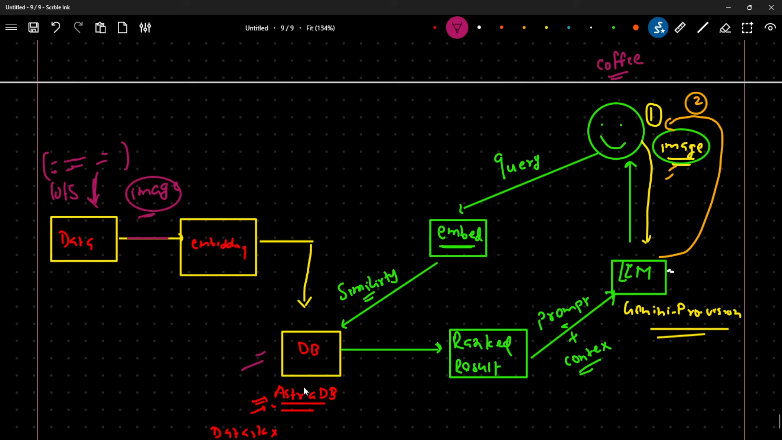)

From the vertex ai : for accessing the model

In [ ]:
PROJECT_ID = "my-project-ml-446310"
LOCATION = "us-central1"

For accessing database : astradb

In [ ]:
ASTRA_DB_API_ENDPOINT = "https://576f97a5-d5bf-4ea4-8d5c-5a6c13f01e08-us-east-2.apps.astra.datastax.com"
ASTRA_DB_APPLICATION_TOKEN = "AstraCS:vDPgZCQkJypAhDvZMeQzDnqO:ed912eaad4122a3c93164a0149e1cd8e4b5f7102b8c0d31e240e50e1cacd4417"
# ASTRA_DB_KEYSPACE = "default_keyspace"

In [ ]:
import getpass, os, requests

if "GCP_PROJECT_ID" not in os.environ:
  os.environ["GCP_PROJECT_ID"] = getpass.getpass("Provide your GCP Project ID")

if "LOCATION" not in os.environ:
  os.environ["LOCATION"] = getpass.getpass("Provide your GCP Location")

if "ASTRA_DB_ENDPOINT" not in os.environ:
  os.environ["ASTRA_DB_ENDPOINT"] = getpass.getpass("Provide your Astra DB Endpoint")

if "ASTRA_DB_TOKEN" not in os.environ:
  os.environ["ASTRA_DB_TOKEN"] = getpass.getpass("Provide your Astra DB Token")

Provide your GCP Project ID··········
Provide your GCP Location··········
Provide your Astra DB Endpoint··········
Provide your Astra DB Token··········


## Authenticate your notebook environment ( Colab only )

In [ ]:
!gcloud config set project {os.getenv("GCP_PROJECT_ID")}

Updated property [core/project].


without the abouve aythentication you cannot access with the vertwx ai. Make sure google cloud google account to be same as vertex ai

In [ ]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

In [ ]:
!gcloud auth list

      Credentialed Accounts
ACTIVE  ACCOUNT
*       prabhavsingh0406@gmail.com

To set the active account, run:
    $ gcloud config set account `ACCOUNT`



In [ ]:
# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

In [ ]:
# import libraries

from vertexai.preview.generative_models import (
    GenerationConfig,
    GenerativeModel,
    HarmCategory,
    HarmBlockThreshold,
    Image,
    Part
)

In [ ]:
model = GenerativeModel("gemini-1.0-pro") # which is a pure text model

In [ ]:
responses = model.generate_content("what is FASTLMM. in 2 sentence", stream=True)

In [ ]:
for response in responses:
  print(response.text, end=" ")

FAST LMM is a software tool commonly used in genome-wide association studies (GWAS)  to identify genetic variants associated with complex traits. Specifically, it is designed for efficient and powerful analysis  of mixed linear models, which are statistical models that account for population structure and other confounding factors. 

In [ ]:
# few shot prompting

prompt = """Create a numbered list of 10 items. Each item in the list should be a trend in the tech industry.

Each trend should be less than 5 words."""

In [ ]:
responses = model.generate_content(prompt, stream = True)

In [ ]:
for response in responses:
  print(response.text)

1
. Generative AI
2. Low-code development
3. Quantum computing

4. Metaverse technologies
5. Decentralized finance
6. Hyperautomation
7.
 Cybersecurity mesh
8. Biometric authentication
9. Digital twins
10. Edge computing


## Model parameters

Every prompt you send to the model includes parameter values that control how the model generates a response. The model can generate different results for different parameter values. You can experiment with different model parameters to see how the results change.

In [ ]:
generation_config = GenerationConfig(
    temperature = 0.9,
    top_p = 1.0,
    top_k = 32,
    candidate_count = 1,
    max_output_tokens = 8192,
)


In [ ]:
responses = model.generate_content(
    "What is WGCNA in R?",
    generation_config = generation_config,
    stream = True,
)


In [ ]:
for response in responses:
    print(response.text)

##
 WGCNA in R: Understanding gene coexpression networks

WGCNA,
 which stands for Weighted Gene Correlation Network Analysis,  is a powerful package in the R
 statistical programming language, designed to explore relationships between **genes based on their expression levels**. It is particularly useful for analyzing large datasets, such as those generated by RNA
 sequencing (RNAseq) or microarray experiments, where thousands of genes are measured simultaneously.

Here are some key points to understand about WGCNA:

**
Purpose:**

* WGCNA aims to identify **clusters of co-expressed genes**, meaning genes with similar expression patterns across multiple samples. These clusters may represent biological modules or pathways that work together to perform specific functions in the cell.
* It
 also helps in **identifying hub genes** within these modules, which are highly connected and potentially play a crucial role in the module's function.

 **Key features:**

* WGCNA uses a **network appr

In [ ]:
from langchain_google_vertexai import ChatVertexAI

In [ ]:
from langchain.schema.messages import HumanMessage
from PIL import Image, ImageFile
import os, sys

In [ ]:
chat = ChatVertexAI(model_name="gemini-1.0-pro-vision",safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE
    },)

In [ ]:
image_message = {
    "type": "image_url",
    "image_url": {"url": "/content/vande_bharat.jpg"},
}
text_message = {
    "type": "text",
    "text": "What is this image? Share a link to book ticket for it",
}

In [ ]:
message = HumanMessage(content=[text_message, image_message])

In [ ]:
output = chat([message])

In [ ]:
print(output.content)

 The image shows the Vande Bharat Express, a high-speed train operated by the Indian Railways. The train was launched in 2019 and currently operates on two routes: Delhi-Varanasi and Delhi-Katra. The train has a maximum speed of 160 km/h and features modern amenities such as air-conditioning, Wi-Fi, and infotainment systems.

You can book tickets for the Vande Bharat Express through the IRCTC website or app.


In [ ]:
import pandas as pd

d = {'name': ["Saucer", "Saucer Ceramic", "Milk Jug Assembly", "Handle Steam Wand Kit (New Version From 0735 PDC)", "Spout Juice Small (From 0637 to 1041 PDC)", "Cleaning Steam Wand", "Jug Frothing", "Spoon Tamping 50mm", "Collar Grouphead 50mm", "Filter 2 Cup Dual Wall 50mm", "Filter 1 Cup 50mm", "Water Tank Assembly", "Portafilter Assembly 50mm", "Milk Jug Assembly", "Filter 2 Cup 50mm" ],
     'url': ["https://www.breville.com/us/en/parts-accessories/parts/sp0014946.html?sku=SP0014946", "https://www.breville.com/us/en/parts-accessories/parts/sp0014914.html?sku=SP0014914", "https://www.breville.com/us/en/parts-accessories/parts/sp0011391.html?sku=SP0011391", "https://www.breville.com/us/en/parts-accessories/parts/sp0010719.html?sku=SP0010719", "https://www.breville.com/us/en/parts-accessories/parts/sp0010718.html?sku=SP0010718", "https://www.breville.com/us/en/parts-accessories/parts/sp0003247.html?sku=SP0003247", "https://www.breville.com/us/en/parts-accessories/parts/sp0003246.html?sku=SP0003246", "https://www.breville.com/us/en/parts-accessories/parts/sp0003243.html?sku=SP0003243", "https://www.breville.com/us/en/parts-accessories/parts/sp0003232.html?sku=SP0003232", "https://www.breville.com/us/en/parts-accessories/parts/sp0003231.html?sku=SP0003231", "https://www.breville.com/us/en/parts-accessories/parts/sp0003230.html?sku=SP0003230", "https://www.breville.com/us/en/parts-accessories/parts/sp0003225.html?sku=SP0003225", "https://www.breville.com/us/en/parts-accessories/parts/sp0003216.html?sku=SP0003216", "https://www.breville.com/us/en/parts-accessories/parts/sp0001875.html?sku=SP0001875", "https://www.breville.com/us/en/parts-accessories/parts/sp0000166.html?sku=SP0000166"],
     'price': ["10.95", "4.99", "14.95", "8.95", "10.95", "6.95", "24.95", "8.95", "6.95", "12.95", "12.95", "14.95", "10.95", "16.95", "11.95"],
     'image': ["https://www.breville.com/content/dam/breville/us/catalog/products/images/sp0/sp0014946/tile.jpg", "https://www.breville.com/content/dam/breville/us/catalog/products/images/sp0/sp0014914/tile.jpg", "https://www.breville.com/content/dam/breville/us/catalog/products/images/sp0/sp0011391/tile.jpg", "https://www.breville.com/content/dam/breville/ca/catalog/products/images/sp0/sp0010719/tile.jpg", "https://www.breville.com/content/dam/breville/ca/catalog/products/images/sp0/sp0010718/tile.jpg", "https://www.breville.com/content/dam/breville/ca/catalog/products/images/sp0/sp0003247/tile.jpg", "https://assets.breville.com/cdn-cgi/image/width=400,format=auto/Spare+Parts+/Espresso+Machines/BES250/SP0003246/SP0003246_IMAGE1_400X400.jpg", "https://assets.breville.com/cdn-cgi/image/width=400,format=auto/Spare+Parts+/Espresso+Machines/ESP8/SP0003243/SP0003243_IMAGE1_400X400.jpg", "https://assets.breville.com/cdn-cgi/image/width=400,format=auto/Spare+Parts+/Espresso+Machines/ESP8/SP0003232/SP0003232_IMAGE1_400x400.jpg", "https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0003231/tile.jpg", "https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0003230/tile.jpg", "https://www.breville.com/content/dam/breville/ca/catalog/products/images/sp0/sp0003225/tile.jpg", "https://www.breville.com/content/dam/breville/ca/catalog/products/images/sp0/sp0003216/tile.jpg", "https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0001875/tile.jpg", "https://www.breville.com/content/dam/breville/us/catalog/products/images/sp0/sp0000166/tile.jpg"]}
df = pd.DataFrame(data=d)
df

,name,url,price,image
0,Saucer,https://www.breville.com/us/en/parts-accessori...,10.95,https://www.breville.com/content/dam/breville/...
1,Saucer Ceramic,https://www.breville.com/us/en/parts-accessori...,4.99,https://www.breville.com/content/dam/breville/...
2,Milk Jug Assembly,https://www.breville.com/us/en/parts-accessori...,14.95,https://www.breville.com/content/dam/breville/...
3,Handle Steam Wand Kit (New Version From 0735 PDC),https://www.breville.com/us/en/parts-accessori...,8.95,https://www.breville.com/content/dam/breville/...
4,Spout Juice Small (From 0637 to 1041 PDC),https://www.breville.com/us/en/parts-accessori...,10.95,https://www.breville.com/content/dam/breville/...
5,Cleaning Steam Wand,https://www.breville.com/us/en/parts-accessori...,6.95,https://www.breville.com/content/dam/breville/...
6,Jug Frothing,https://www.breville.com/us/en/parts-accessori...,24.95,https://assets.breville.com/cdn-cgi/image/widt...
7,Spoon Tamping 50mm,https://www.breville.com/us/en/parts-accessori...,8.95,https://assets.breville.com/cdn-cgi/image/widt...
8,Collar Grouphead 50mm,https://www.breville.com/us/en/parts-accessori...,6.95,https://assets.breville.com/cdn-cgi/image/widt...
9,Filter 2 Cup Dual Wall 50mm,https://www.breville.com/us/en/parts-accessori...,12.95,https://www.breville.com/content/dam/breville/...


In [ ]:
import vertexai, json, requests
from vertexai.preview.vision_models import MultiModalEmbeddingModel, Image
from astrapy.db import AstraDB, AstraDBCollection
from google.colab import files

<ipython-input-38-f146adbe4615>:3: DeprecatedWarning: All of 'astrapy.core.*', 'astrapy.api.*', 'astrapy.db.*' and 'astrapy.ops.*' is deprecated as of 1.5.0 and will be removed in 2.0.0. Please refer to https://docs.datastax.com/en/astra-db-serverless/api-reference/dataapiclient.html to start the (recommended) path forward to the current API, and to https://github.com/datastax/astrapy?tab=readme-ov-file#appendix-b-compatibility-with-pre-100-library for details on the deprecated modules.
  from astrapy.db import AstraDB, AstraDBCollection


In [ ]:
model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding@001")

In [ ]:
# Initialize our vector db
astra_db = AstraDB(token=os.getenv("ASTRA_DB_TOKEN"), api_endpoint=os.getenv("ASTRA_DB_ENDPOINT"))

In [ ]:
collection = astra_db.create_collection(collection_name="coffee_shop_ecommerce", dimension=1408)

In [ ]:
for i in range(len(df)):
  name = df.loc[i, "name"]
  image = df.loc[i, "image"]
  price = df.loc[i, "price"]
  url = df.loc[i, "url"]

  # Download this product's image and save it to the Colab filesystem.
  # In a production system this binary data would be stored in Google Cloud Storage
  img_data = requests.get(image).content
  with open(f'{name}.png', 'wb') as handler:
    handler.write(img_data)

  # load the image from filesystem and compute the embedding value
  img = Image.load_from_file(f'{name}.png')
  embeddings = model.get_embeddings(image=img, contextual_text=name)

  try:
    # add to the AstraDB Vector Database
    collection.insert_one({
        "_id": i,
        "name": name,
        "image": image,
        "url": url,
        "price": price,
        "$vector": embeddings.image_embedding,
      })
  except Exception as error:
    # if you've already added this record, skip the error message
    error_info = json.loads(str(error))
    if error_info[0]['errorCode'] == "DOCUMENT_ALREADY_EXISTS":
      print("Document already exists in the database.  Skipping.")

Astradb me images ki embeddings ghus gyi. See we are able to create embeddings of images.

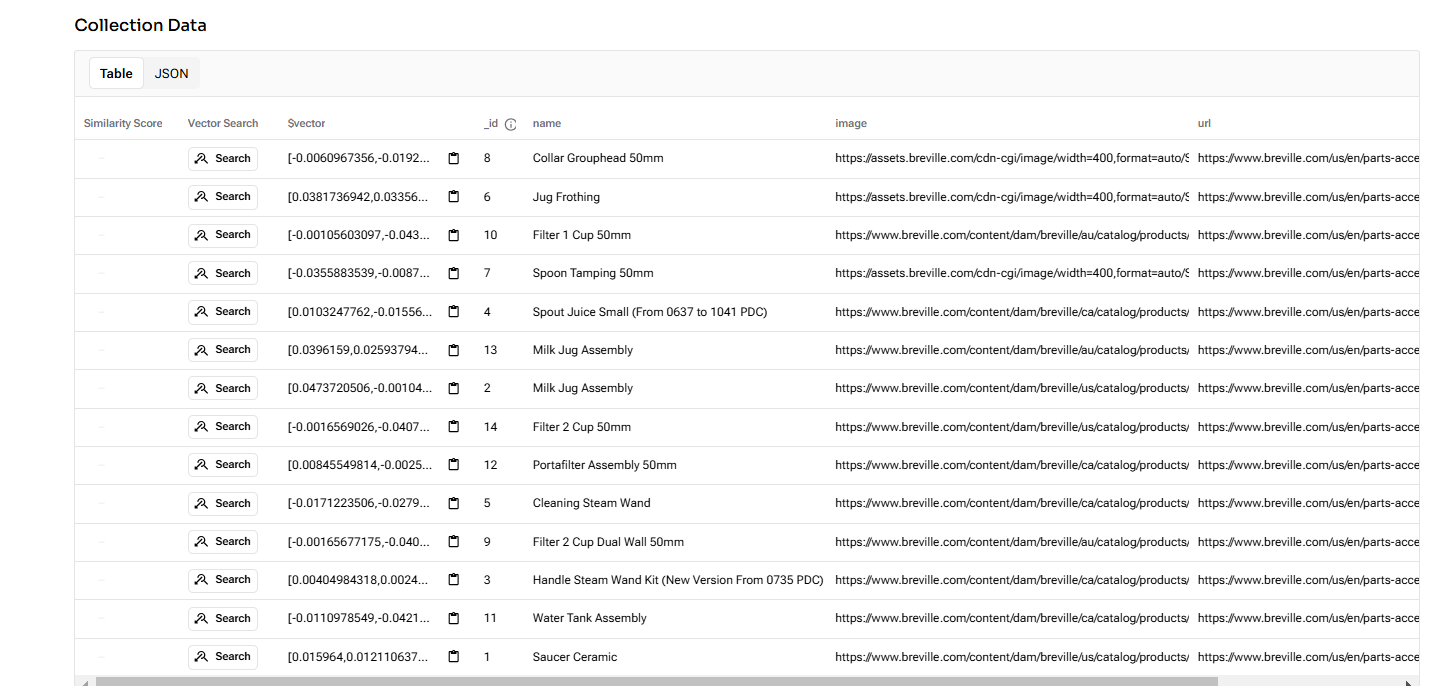

In [ ]:
import json

# Embed the similar item
img = Image.load_from_file('vande_bharat.jpg')

In [ ]:
embeddings = model.get_embeddings(image=img, contextual_text="Most Advanced Indian Train")

In [ ]:
embeddings

In [ ]:
print(embeddings.image_embedding)

[-0.0209770575, 0.0323984884, -0.0405490212, 0.00596294599, -0.00750167808, 0.0235077813, -0.0106184045, 0.017484583, 0.00301358057, 0.0134625128, -0.0193262044, -0.0184070822, -0.00520267291, 0.136213437, -0.00889734924, 0.00323768891, -0.0345645249, -0.00323188934, 0.0155681642, -0.00137448672, -0.0573604107, -0.0436120667, -0.0161515921, 0.0266081579, -0.00825017877, -0.00925549, -0.0361883, 0.000816907443, -0.0111812465, 0.00106603047, 0.00766937481, -0.0182858668, -0.000298559375, -0.0217007864, -0.00536013395, -0.0242450144, -0.0248974115, -0.0181177109, 0.00839299709, 0.0049955328, -0.00266906642, 0.00530264387, 0.0030327423, -0.0093548242, -0.00616658386, -0.0305955485, -0.0209757481, -0.0154665802, 0.0122690573, -0.0164464489, 0.0320944712, -0.0157805253, -0.0135897556, 0.0134152081, -0.0123692984, -0.00836777873, -0.00760828285, -0.0110792993, 0.0291505959, 0.00535275089, 0.00331729883, 0.0151774622, 0.0100114886, -0.0228005704, 0.00984491315, -0.00121662929, 0.00349718099, -

In [ ]:
len(embeddings.image_embedding)

1408

so this is not 768 lenth. this it 1408 feature vector

In [ ]:
len(embeddings.text_embedding)

1408

In [ ]:
# now to perform similarity search in the vector database, ande bharat to hai nhi image list me, dekhte hain kya hota hai

# Perform the vector search against AstraDB Vector
documents = collection.vector_find(
    embeddings.image_embedding,
    limit=3,
)

In [ ]:
documents

[{'_id': 12,
  'name': 'Portafilter Assembly 50mm',
  'image': 'https://www.breville.com/content/dam/breville/ca/catalog/products/images/sp0/sp0003216/tile.jpg',
  'url': 'https://www.breville.com/us/en/parts-accessories/parts/sp0003216.html?sku=SP0003216',
  'price': '10.95',
  '$similarity': 0.66512835},
 {'_id': 6,
  'name': 'Jug Frothing',
  'image': 'https://assets.breville.com/cdn-cgi/image/width=400,format=auto/Spare+Parts+/Espresso+Machines/BES250/SP0003246/SP0003246_IMAGE1_400X400.jpg',
  'url': 'https://www.breville.com/us/en/parts-accessories/parts/sp0003246.html?sku=SP0003246',
  'price': '24.95',
  '$similarity': 0.65699995},
 {'_id': 13,
  'name': 'Milk Jug Assembly',
  'image': 'https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0001875/tile.jpg',
  'url': 'https://www.breville.com/us/en/parts-accessories/parts/sp0001875.html?sku=SP0001875',
  'price': '16.95',
  '$similarity': 0.65565956}]

In [ ]:
related_products_csv = "name, image, price, url\n"
for doc in documents:
  related_products_csv += f"{doc['name']}, {doc['image']}, {doc['price']}, {doc['url']},\n"

In [ ]:
print(related_products_csv)

name, image, price, url
Portafilter Assembly 50mm, https://www.breville.com/content/dam/breville/ca/catalog/products/images/sp0/sp0003216/tile.jpg, 10.95, https://www.breville.com/us/en/parts-accessories/parts/sp0003216.html?sku=SP0003216,
Jug Frothing, https://assets.breville.com/cdn-cgi/image/width=400,format=auto/Spare+Parts+/Espresso+Machines/BES250/SP0003246/SP0003246_IMAGE1_400X400.jpg, 24.95, https://www.breville.com/us/en/parts-accessories/parts/sp0003246.html?sku=SP0003246,
Milk Jug Assembly, https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0001875/tile.jpg, 16.95, https://www.breville.com/us/en/parts-accessories/parts/sp0001875.html?sku=SP0001875,



In [ ]:
image_message = {
    "type": "image_url",
    "image_url": {"url": "/content/coffee_maker_part.jpg"},
}
text_message = {
    "type": "text",
    "text": f"What we have in this image? Share the URL and price to purchase a replacement. Here are related products {related_products_csv}",
}

In [ ]:
message = HumanMessage(content=[text_message, image_message])

In [ ]:
chat = ChatVertexAI(model_name="gemini-1.0-pro-vision",safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE
    },)

In [ ]:
output = chat([message])

In [ ]:
print(output.content)

 The image shows a glass coffee pot with a black lid and handle. It is a replacement part for the Breville BDC450 coffee maker. The pot is made of glass and has a capacity of 12 cups. It is dishwasher safe and has a one-year warranty. The replacement part can be purchased from the Breville website for $16.95.


In [ ]:
chat = ChatVertexAI(model_name="gemini-2.0-flash-exp",safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE
    },)

output = chat([message])

print(output.content)

Certainly!

Based on the image provided and the context of the related products, the image shows a **Milk Jug Assembly**. 

Here's the purchase information:

*   **Name:** Milk Jug Assembly
*   **URL:** https://www.breville.com/us/en/parts-accessories/parts/sp0001875.html?sku=SP0001875
*   **Price:** $16.95


see gemini flash 2.0 exp so good.

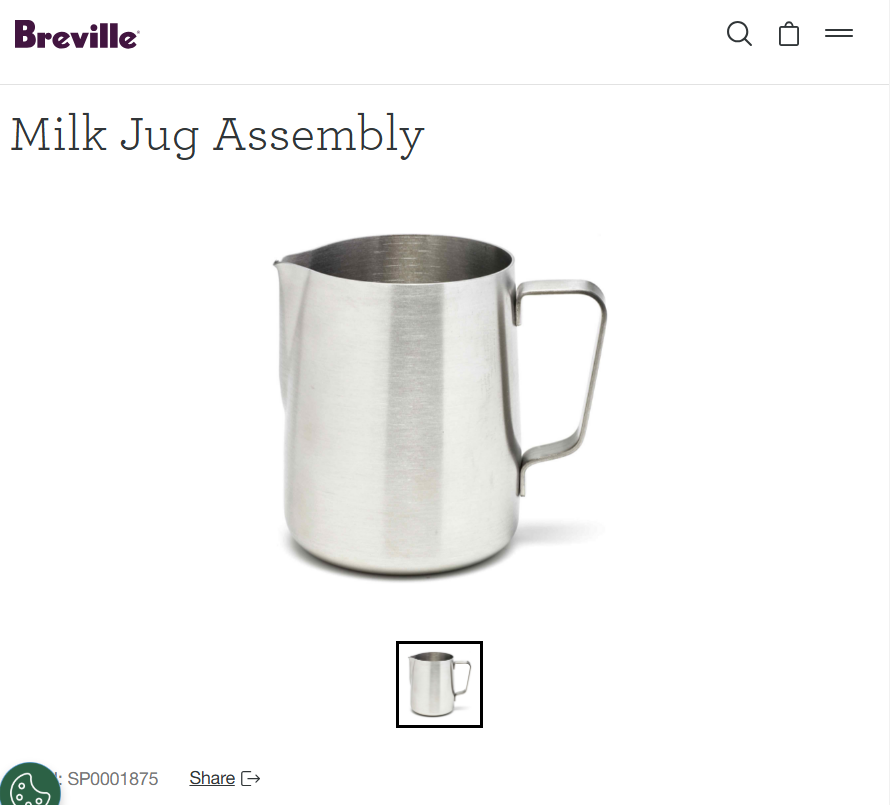